<a href="https://colab.research.google.com/github/dirdamegantara/PCD_domainspasial/blob/main/Tugas_PCD_Domain_Spasial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

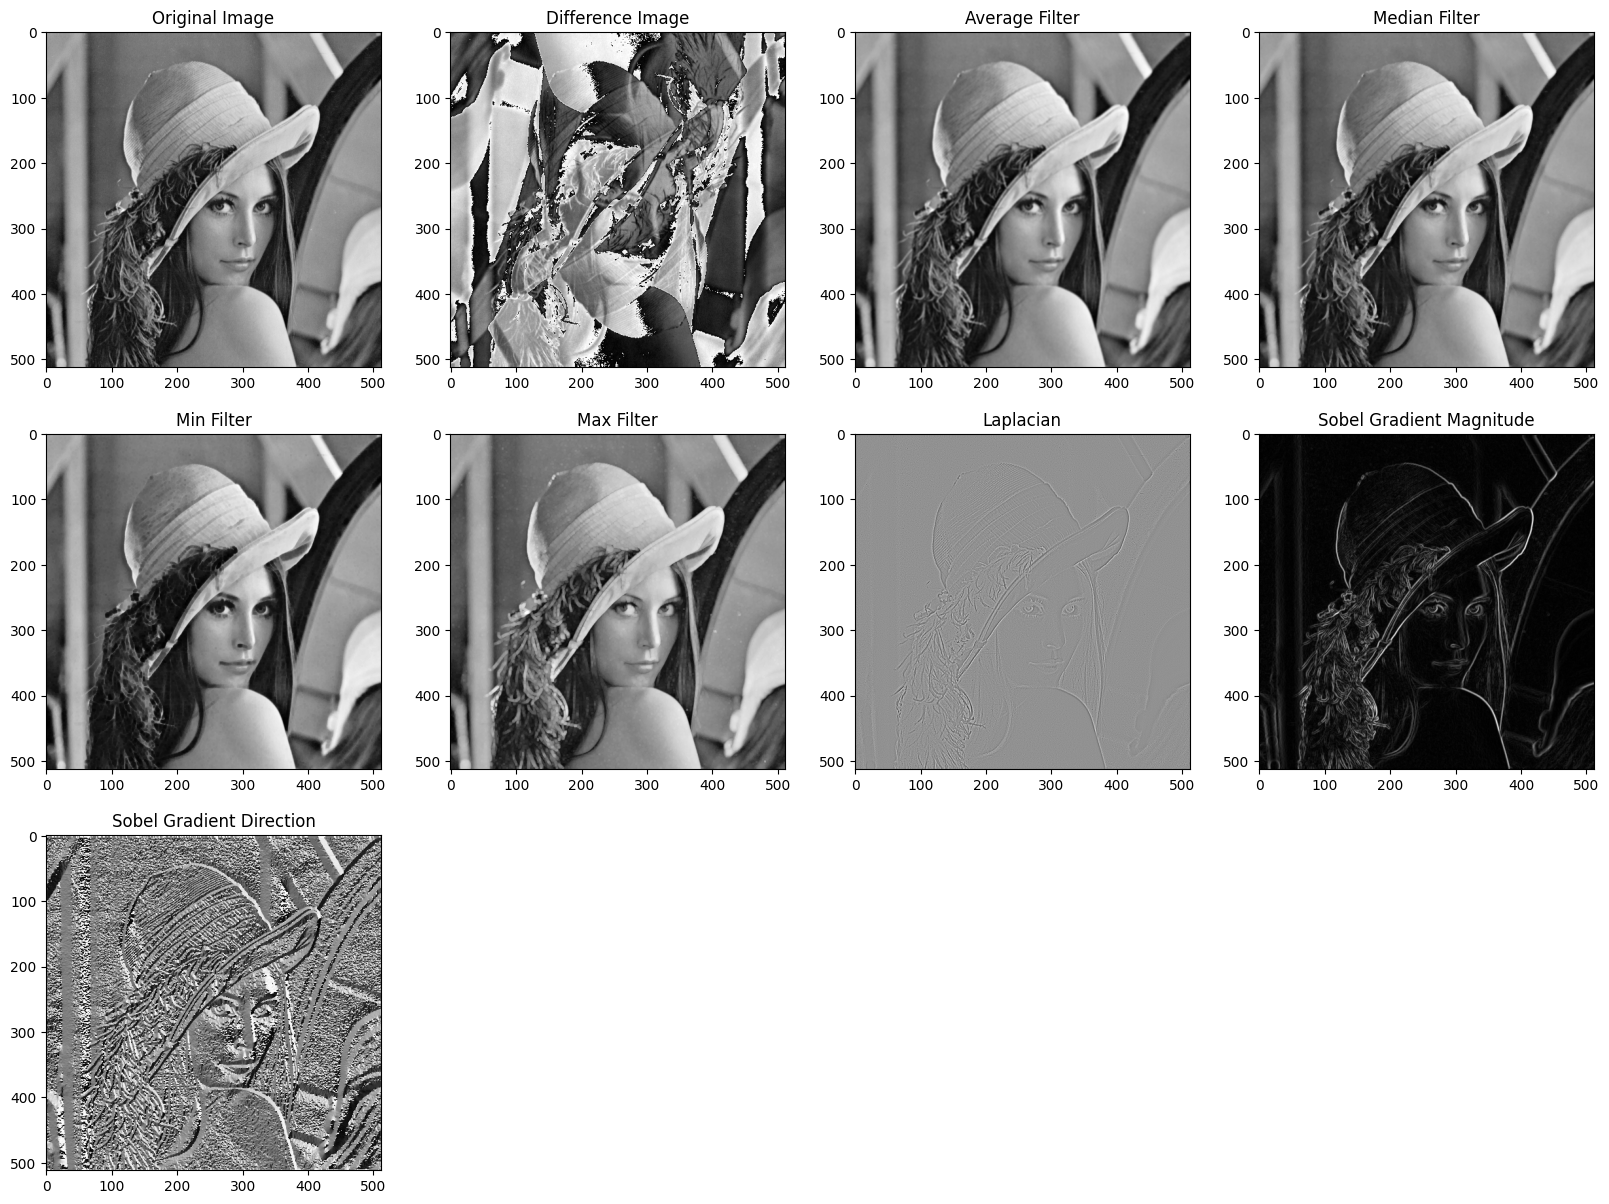

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Lena.png')

if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

def difference_image(image1, image2):
    difference = np.abs(image1 - image2)
    return difference

def average_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

def min_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image, kernel)

def max_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(image, kernel)

def laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F)

def sobel_gradient(image):
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)
    gradient_direction = np.arctan2(sobely, sobelx)
    return gradient_magnitude, gradient_direction

difference_result = difference_image(gray_image, cv2.flip(gray_image, -1))

average_filtered_image = average_filter(gray_image, 3)

median_filtered_image = median_filter(gray_image, 3)

min_filtered_image = min_filter(gray_image, 3)

max_filtered_image = max_filter(gray_image, 3)

laplacian_result = laplacian(gray_image)

sobel_gradient_magnitude, sobel_gradient_direction = sobel_gradient(gray_image)

plt.figure(figsize=(20, 20))

plt.subplot(4, 4, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')

plt.subplot(4, 4, 2)
plt.title("Difference Image")
plt.imshow(difference_result, cmap='gray')

plt.subplot(4, 4, 3)
plt.title("Average Filter")
plt.imshow(average_filtered_image, cmap='gray')

plt.subplot(4, 4, 4)
plt.title("Median Filter")
plt.imshow(median_filtered_image, cmap='gray')

plt.subplot(4, 4, 5)
plt.title("Min Filter")
plt.imshow(min_filtered_image, cmap='gray')

plt.subplot(4, 4, 6)
plt.title("Max Filter")
plt.imshow(max_filtered_image, cmap='gray')

plt.subplot(4, 4, 7)
plt.title("Laplacian")
plt.imshow(laplacian_result, cmap='gray')

plt.subplot(4, 4, 8)
plt.title("Sobel Gradient Magnitude")
plt.imshow(sobel_gradient_magnitude, cmap='gray')

plt.subplot(4, 4, 9)
plt.title("Sobel Gradient Direction")
plt.imshow(sobel_gradient_direction, cmap='gray')

plt.show()
